In [24]:
import os
import csv
import numpy  as np
import pandas as pd

import matplotlib
matplotlib.use('nbagg')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data_folder = "/Users/WillC/Documents/Rutgers/3rd_Year/Spring_Semester/intro-data-science/neolithic_prediction_modeling/data/EUROEVOL_Dataset"
data_file = "EUROEVOL09-07-201516-34_CommonSites.csv"
commonsites = os.path.join(data_folder, data_file)

df = pd.read_csv(commonsites, sep=',', error_bad_lines=False)
df.head(10)

Skipping line 2378: expected 5 fields, saw 6
Skipping line 4392: expected 5 fields, saw 9



,Country,Latitude,Longitude,SiteID,SiteName
0,France,47.5100,6.80000,S1000,Pierre Folle
1,France,48.2300,0.16000,S1001,A 28 Nord
2,France,48.2300,0.16000,S1002,A 28
3,Germany,50.7886,6.07437,S1003,"Aachen, Lousberg"
4,Netherlands,51.4200,5.29000,S1004,Aardhorst-Vessem
5,Sweden,55.4000,13.60000,S1007,Abbekås
6,Great Britain,51.9691,-5.08230,S1010,Abermawr I
7,Great Britain,51.6800,-1.26130,S1011,Abingdon
8,France,46.6300,0.59000,S1012,Abri de Bellefonds
9,Belgium,50.2500,4.90000,S1014,Abri des Autours


In [30]:
country1 = ''
country2 = 'Ireland'

country_df = df.where((df['Country'] == country1) | (df['Country'] == country2))
# set min and max latitude and longitude
minlat = country_df['Latitude'].min()
maxlat = country_df['Latitude'].max()
minlon = country_df['Longitude'].min()
maxlon = country_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

minlat -= (difflat / 10) * 10
maxlat += (difflat / 10) * 10
minlon -= (difflon / 10) * 10
maxlon += (difflon / 10) * 10

# country_df = country_df.where(df['Latitude'] <= 60.)
la = 51.
lo = -10.

# country_df = country_df.where( 
#                                (df['Latitude']  <= la+1.) &
#                                (df['Latitude']  >= la)    &
#                                (df['Longitude'] <= lo+1.) &
#                                (df['Longitude'] >= lo) )

print 'limited to Longitude range [%d, %d] and Latitude range [%d, %d]' % (la, la+1., lo, lo+1.)
print '%s %s has %d sites'% (country1, country2, country_df['Country'].count())

# minlat = country_df['Latitude'].min()
# maxlat = country_df['Latitude'].max()
# minlon = country_df['Longitude'].min()
# maxlon = country_df['Longitude'].max()

country_df = country_df.dropna()
print 'latitude  range : [%10.5f, %10.5f]' % (country_df['Latitude'].min(), country_df['Latitude'].max())
print 'longitude range : [%10.5f, %10.5f]' % (country_df['Longitude'].min(), country_df['Longitude'].max())

limited to Longitude range [51, 52] and Latitude range [-10, -9]
 Ireland has 566 sites
latitude  range : [  51.48480,   55.20400]
longitude range : [ -10.45560,   -5.56003]


<IPython.core.display.Javascript object>


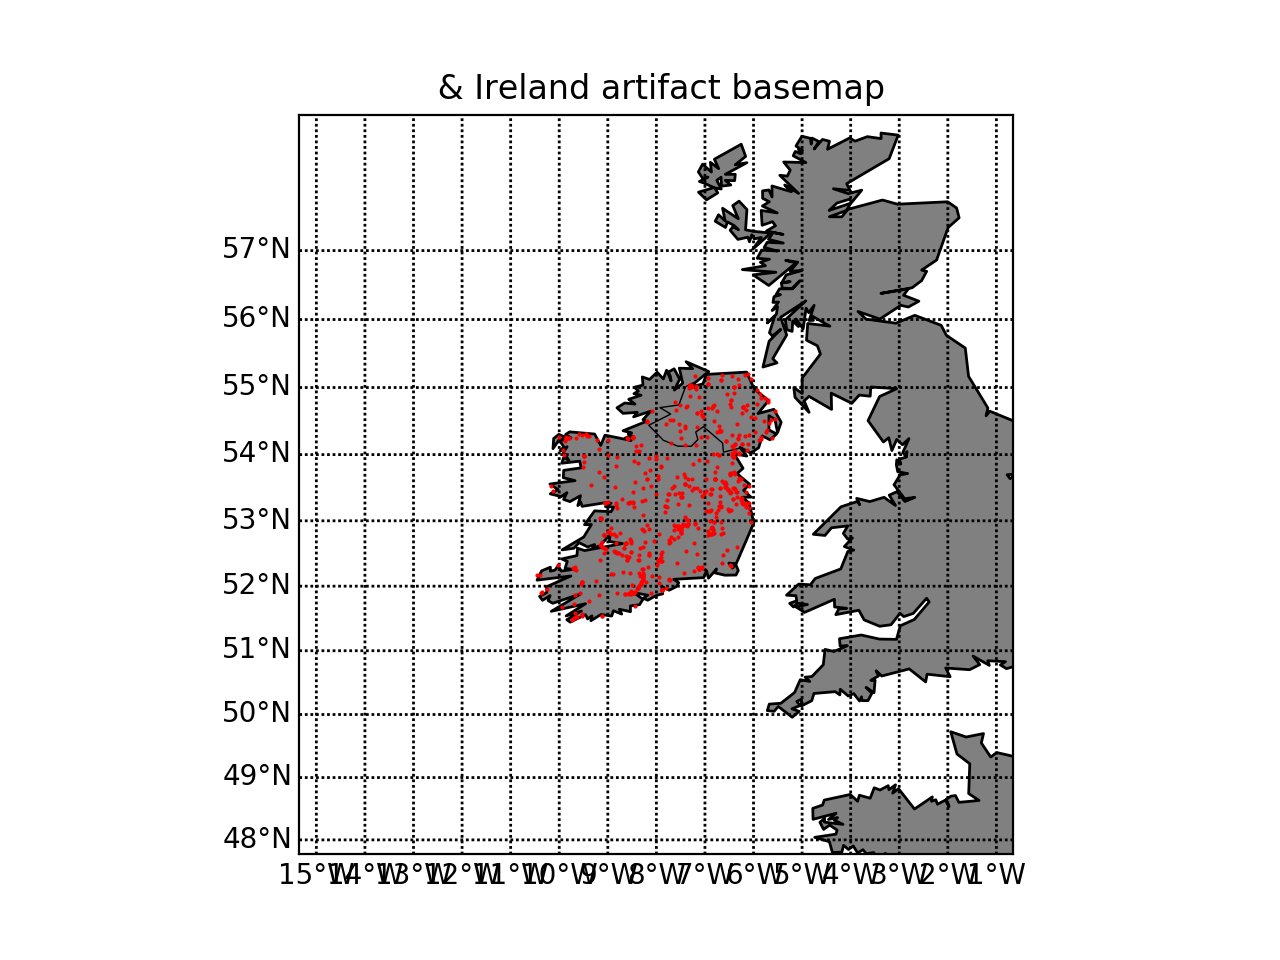

In [31]:
m = Basemap(projection='mill',
            llcrnrlat=minlat,urcrnrlat=maxlat,     
            llcrnrlon=minlon,urcrnrlon=maxlon,resolution='l')

m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
m.fillcontinents(color='grey')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawrivers()
# m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
# m.drawmapboundary(fill_color='#FFFFFF')
# m.bluemarble()

lat = country_df['Latitude'].tolist()
lon = country_df['Longitude'].tolist()

x, y = m(lon, lat)
m.plot(x, y, 'r.', markersize=1)

plt.title('%s & %s artifact basemap' % (country1, country2))
plt.show()

In [16]:
country_df.head(100)

,Country,Latitude,Longitude,SiteID,SiteName
379,Great Britain,50.9774,-1.13240,S1597,Corhampton
451,Great Britain,50.9330,-1.99000,S1740,Dorset Cursus
731,Great Britain,50.7124,-1.74790,S2227,Hengistbury Head
1942,Great Britain,50.9366,-1.99150,S4245,Wyke Down
2202,Great Britain,50.9320,-1.99920,S4740,Fir tree field
2319,Great Britain,50.9371,-1.99209,S5067,Wyke down henge 2
2476,Great Britain,50.5804,-1.25915,S6210,Binnel Point
2542,Great Britain,50.7358,-1.77750,S6276,Christchurch
2618,Great Britain,50.9033,-1.93457,S6352,Edmondsham
2646,Great Britain,50.6669,-1.37450,S6380,Gallibury Down
